# Notebook for initial pytrends data
https://pypi.org/project/pytrends/
    
    

In [1]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas

## Connect to Google

In [2]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [12]:
kw_list = ["Democracy", "Corruption"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

,Democracy,Corruption,isPartial
date,,,
2018-01-29 00:00:00,66,39,False
2018-01-29 01:00:00,72,43,False
2018-01-29 02:00:00,75,44,False
2018-01-29 03:00:00,67,49,False
2018-01-29 04:00:00,67,49,False
...,...,...,...
2018-02-04 20:00:00,49,34,False
2018-02-04 21:00:00,52,37,False
2018-02-04 22:00:00,52,36,False


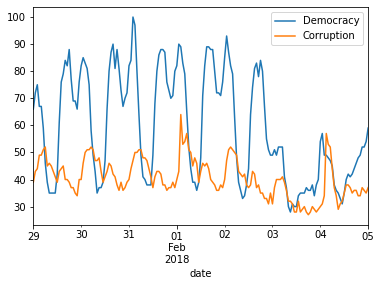

In [18]:
x = pytrends.interest_over_time()
x.plot()
pytrends.interest_over_time()

<AxesSubplot:xlabel='date'>

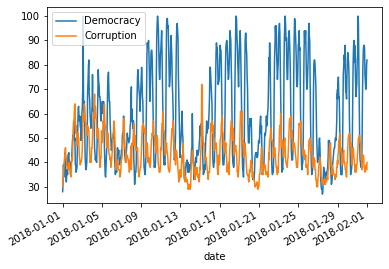

In [17]:
y = pytrends.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)
y.plot()

<AxesSubplot:xlabel='geoName'>

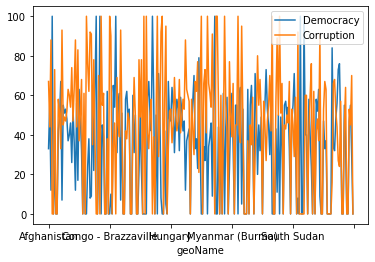

In [15]:
z = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
z.plot()